# SRM 641 Python Week 5 Machine Learning 2

## In this notebook, we will use real data for a classification machine learning task.

### Data
Wine. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. Data includes 11 different chemical properties of wine and a quality score from wine experts.

### Data source:
- Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml/index.php]. 
Irvine, CA: University of California, School of Information and Computer Science.
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

### Steps
1. Problem definition: Classification of wines (red or white) based on their chemical properties.
2. Question: Given chemical properties, can we predict whether the wine is red or white?
3. Load and inspect the data, exploratory data analysis
4. Run and evaluate the classification model 

In [36]:
# ignore warnings

#import warnings
#warnings.filterwarnings('ignore')

### Import libraries

In [1]:
# For plots to appear inside the notebook
%matplotlib inline

# Regular EDA and plotting libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Load and Explore the data

In [3]:
red_wine = pd.read_csv('Data/winequality-red.csv')
white_wine = pd.read_csv('Data/winequality-white.csv', sep=';')

### Data Exploration (EDA)

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how to deal with it
4. How to add, change or remove features to get more out of the data?

In [4]:
# Let's check the red wine data

red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
# Let's check the white wine data

white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [6]:
# How many columns and rows?

white_wine # has 4898 rows and 12 columns

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [7]:
# How many columns and rows?

red_wine  # has 1599 rows and 12 columns

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [8]:
red_wine.shape

(1599, 12)

In [10]:
# What is the data type?

red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
# Are there missing values? None

red_wine.isna().sum(), white_wine.isna().sum()

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
 fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64)

In [14]:
# Calculate stats mean, std, min, max

red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<Axes: title={'center': 'White Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

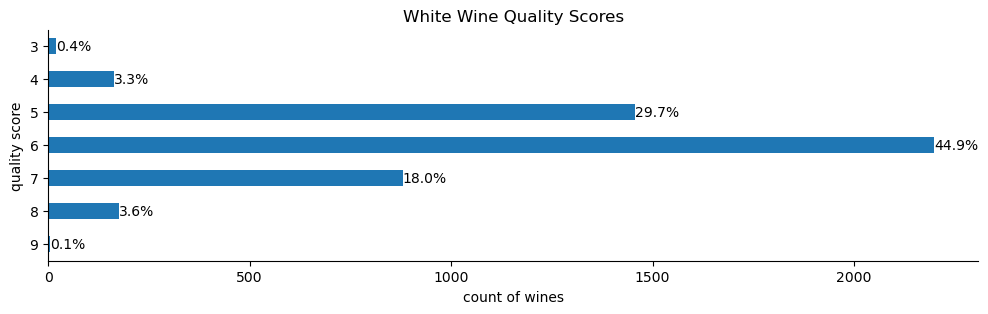

In [15]:
# Plot quality scores

def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index().plot.barh(
        title=f'{kind.title()} Wine Quality Scores', figsize=(12, 3)
    )
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(
            bar.get_width(), 
            bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width()/df.shape[0]:.1%}',
            verticalalignment='center'
        )
    plt.xlabel('count of wines')
    plt.ylabel('quality score')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    return ax

plot_quality_scores(white_wine, 'white')

<Axes: title={'center': 'Red Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

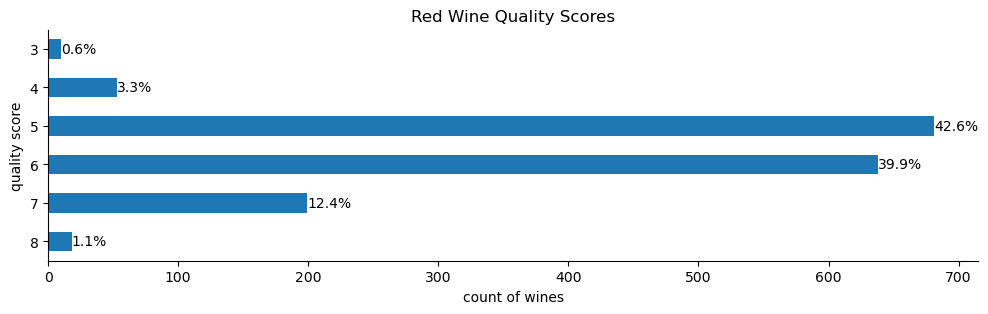

In [16]:
plot_quality_scores(red_wine, 'red')

### Combine the data

Both the data have same columns/variables, we can combine with no further work. We use `pd.concat()` to stack the white wine data on top of the red wine data, adding a column identifying which wine type each observation belongs to:

In [27]:
# Let's combine the red and white wine data, and create a new variable named type with values or red or white

wine = pd.concat([
    white_wine.assign(kind ='white'), red_wine.assign(kind ='red')
])

In [28]:
# View the combined data

wine.sample(5, random_state=10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
848             6.4              0.64         0.21             1.8      0.081   
2529            6.6              0.42         0.13            12.8      0.044   
131             5.6              0.50         0.09             2.3      0.049   
244            15.0              0.21         0.44             2.2      0.075   
1551            6.6              0.19         0.99             1.2      0.122   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
848                  14.0                  31.0  0.99689  3.59       0.66   
2529                 26.0                 158.0  0.99772  3.24       0.47   
131                  17.0                  99.0  0.99370  3.63       0.63   
244                  10.0                  24.0  1.00005  3.07       0.84   
1551                 45.0                 129.0  0.99360  3.09       0.31   

      alcohol  quality   kind  
848       9.8        5    red  
2529      9.0        5  white  
131      13.0        5    red  
244       9.2        7    red  
1551      8.7        6  white

In [61]:
wine.shape

(6497, 14)

In [29]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  kind                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [31]:
# Check how many white and red we have. 

wine.kind.value_counts()

kind
white    4898
red      1599
Name: count, dtype: int64

We have more whites than red.

We want to understand if chemical properties can be used to determine wine type. Unfortunately, describe() gives a very long output, so we need a visualization to compare the wines this way:

In [32]:
wine.drop(columns='quality').groupby('kind').describe()

fixed acidity                                                \
              count      mean       std  min  25%  50%  75%   max   
kind                                                                
red          1599.0  8.319637  1.741096  4.6  7.1  7.9  9.2  15.9   
white        4898.0  6.854788  0.843868  3.8  6.3  6.8  7.3  14.2   

      volatile acidity            ... sulphates       alcohol             \
                 count      mean  ...       75%   max   count       mean   
kind                              ...                                      
red             1599.0  0.527821  ...      0.73  2.00  1599.0  10.422983   
white           4898.0  0.278241  ...      0.55  1.08  4898.0  10.514267   

                                             
            std  min  25%   50%   75%   max  
kind                                         
red    1.065668  8.4  9.5  10.2  11.1  14.9  
white  1.230621  8.0  9.5  10.4  11.4  14.2  

[2 rows x 88 columns]

### How do chemical properties of the wine correlate to each other and the wine type?

It's important to perform an in-depth exploration of the data before modeling. This includes consulting domain experts, looking for correlations between variables, examining distributions, etc. 

We can also visualize the data. One such visualization is the pairplot. To predict high-quality wines, we would try to see if there is a difference in the distribution of our variables for low versus high-quality wines. We would look for correlations between chemical properties and wine type to predict whether the wine is red or white. We would also try to see if there is a difference in the distribution of our variables for white versus red wines. Some other helpful plot types include box plots, pair plots, and the scatter matrix.


In [34]:
# Create a new variable high quality

wine['high_quality'] = pd.cut(wine.quality, bins=[0, 6, 10], labels=[0, 1])
wine.high_quality.value_counts(normalize=True)

high_quality
0    0.803448
1    0.196552
Name: proportion, dtype: float64

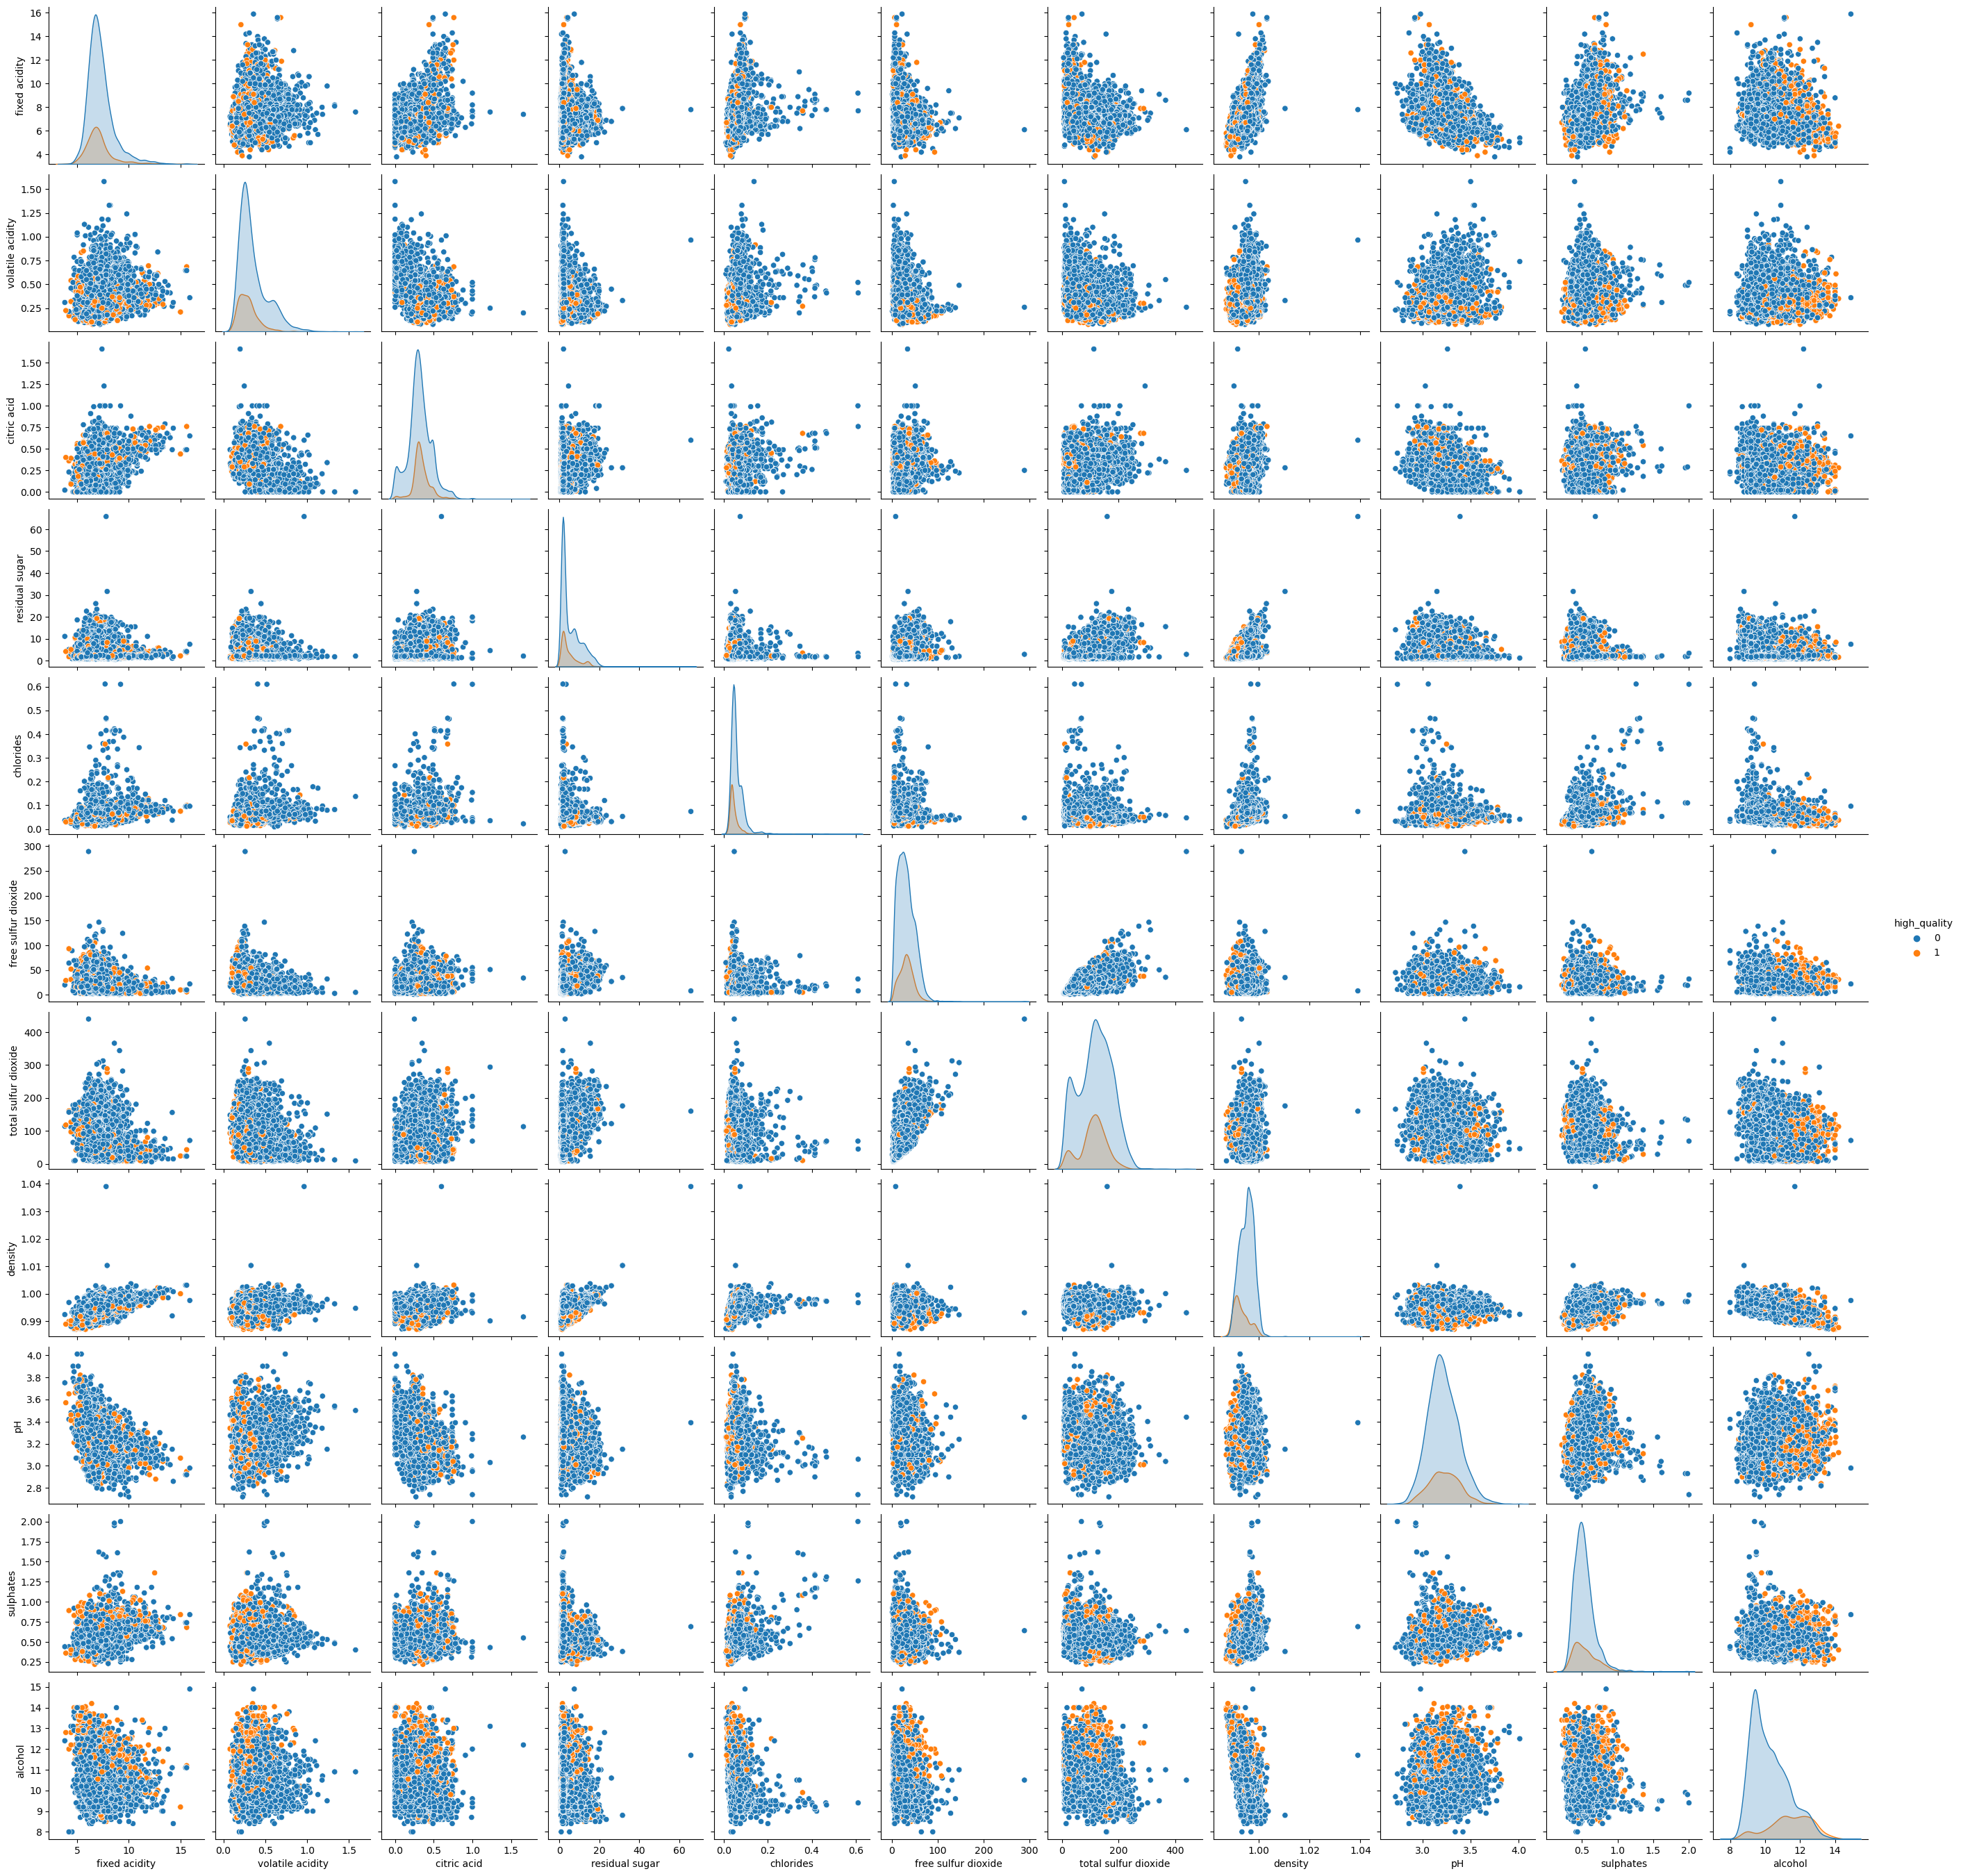

In [37]:
sns.pairplot(wine.drop(columns='quality'), hue='high_quality')

### Comparison of Red and White Wines by Their Chemical Properties
Let's examine box plots for each chemical property by wine type. This visualization will be easier to digest than the output of `describe()`:

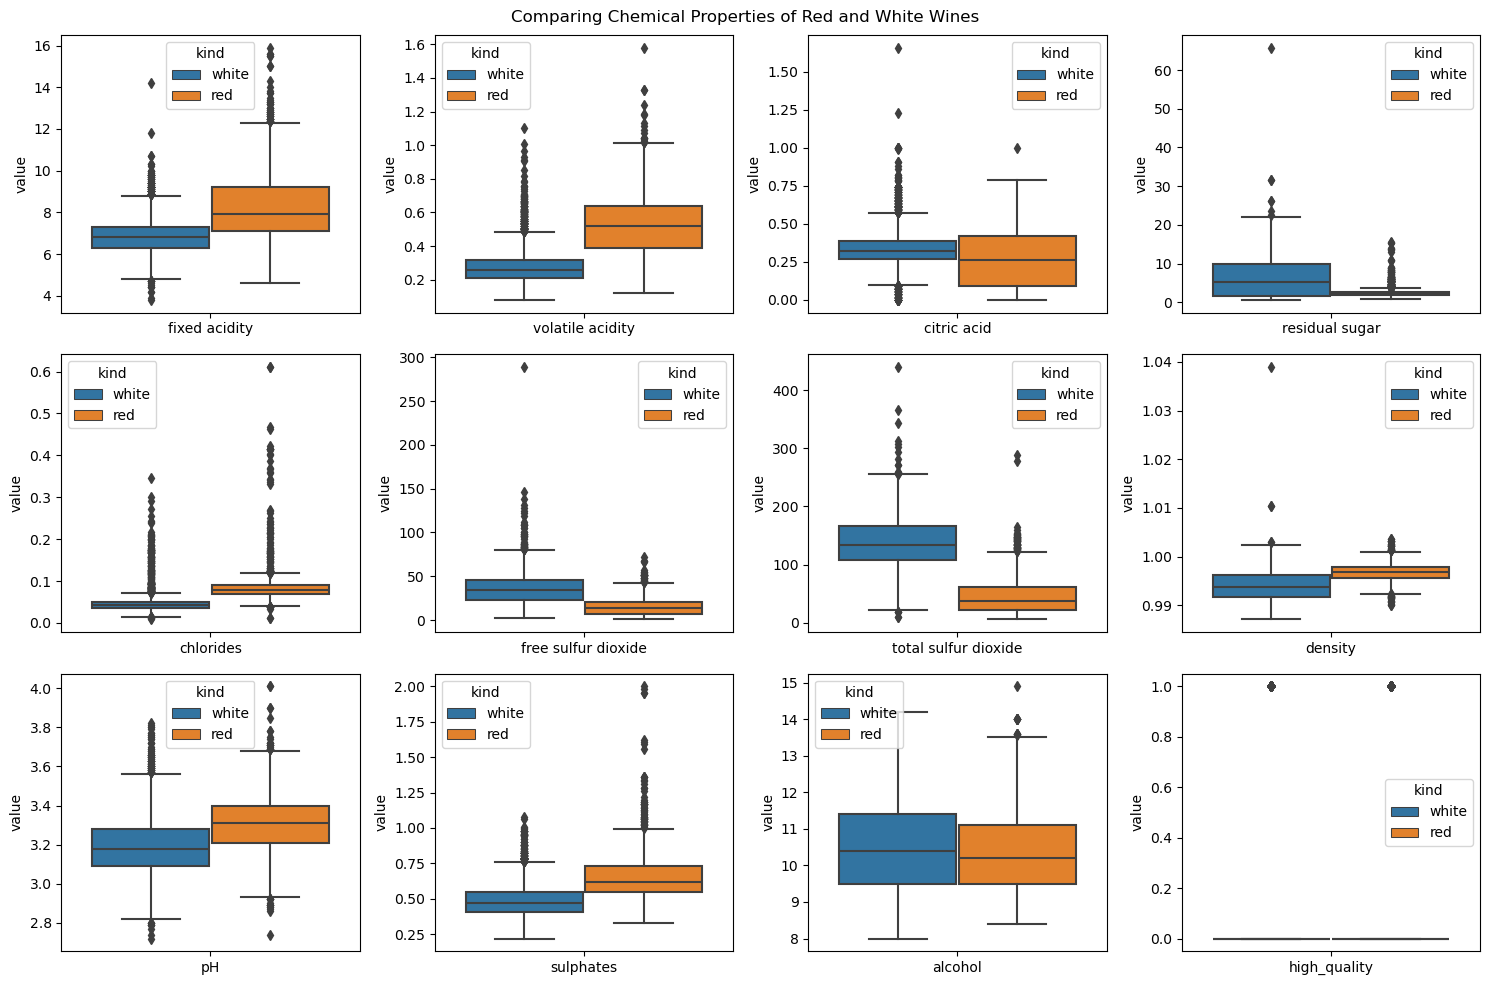

In [39]:
import math

chemical_properties = [col for col in wine.columns if col not in ['quality', 'kind']]
melted = wine.drop(columns='quality').melt(id_vars=['kind'])

fig, axes = plt.subplots(math.ceil(len(chemical_properties) / 4), 4, figsize=(15, 10))
axes = axes.flatten()

for prop, ax in zip(chemical_properties, axes):
    sns.boxplot(
        data=melted[melted.variable.isin([prop])], 
        x='variable', y='value', hue='kind', ax=ax
    ).set_xlabel('')
    
# remove the extra subplots
for ax in axes[len(chemical_properties):]:
    ax.remove()

plt.suptitle('Comparing Chemical Properties of Red and White Wines')
plt.tight_layout()

## Classification of Red and White Wines using Logistic Regression

Build the ML model:
1. Create x and y
2. Get the training and testing set

In [40]:
from sklearn.model_selection import train_test_split

# Create X and Y
wine_y = np.where(wine.kind == 'red', 1, 0) #encode data, show whether or not the wine is red
wine_X = wine.drop(columns=['quality', 'kind'])


In [60]:
# Check the original data

wine_X.shape, wine_y.shape, 

((6497, 12), (6497,))

In [41]:
# Get the train and test sets, 75% for training set and 25% for testing set

w_X_train, w_X_test, w_y_train, w_y_test = train_test_split(
    wine_X, wine_y, test_size=0.25, random_state=0, stratify=wine_y
)

In [63]:
# Check the training sets

w_X_train.shape, w_y_train.shape

((4872, 12), (4872,))

In [65]:
# Check the testing sets

w_X_test.shape, w_y_test.shape

((1625, 12), (1625,))

In [66]:
# Check the first 5 rows of x train dataframe
w_X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2793            6.5             0.370         0.30             2.2      0.033   
1991            7.6             0.200         0.30            14.2      0.056   
2299            7.0             0.320         0.31             6.4      0.031   
834             7.3             0.205         0.31             1.7      0.060   
720             6.6             0.290         0.44             9.0      0.053   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2793                 39.0                 107.0  0.98894  3.22       0.53   
1991                 53.0                 212.5  0.99900  3.14       0.46   
2299                 38.0                 115.0  0.99235  3.38       0.58   
834                  34.0                 110.0  0.99630  3.72       0.69   
720                  62.0                 178.0  0.99685  3.02       0.45   

      alcohol high_quality  
2793     13.5            1  
1991      8.9            1  
2299     12.2            1  
834      10.5            0  
720       8.9            0

3. Build a pipeline with standard scaler followed by logistic regression and fit the model. Pipelines streamline the preprocessing and ensures the training and testing sets are treated the same:

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

white_or_red = Pipeline([
    ('scale', StandardScaler()),  #first scale, standardize, or normalize data
    ('lr', LogisticRegression(random_state=0)) #then run the regression implemented as a linear model for classification
]).fit(w_X_train, w_y_train)

Make and save the predictions of which kind of wine each observation in the test set was:

In [43]:
kind_preds = white_or_red.predict(w_X_test)

4. Evaluate predictions

We evaluate the performance of classification models by looking at how well each class in the data was predicted by the model. We can use a confusion matrix to see how the model's predictions align with the actual class labels. The model only made 13 incorrect predictions (false positive and false negative):

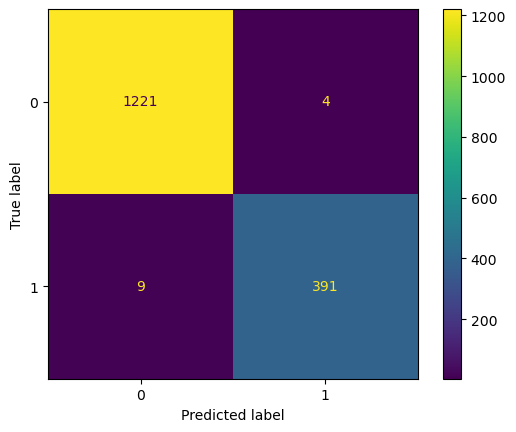

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(w_y_test, kind_preds) # need to label 0 = white, 1 = red

cm_display = ConfusionMatrixDisplay(cm).plot()

### Classification metrics
We can calculate metrics to help evaluate the performance of a classifier. Using Scikit-learn `classification_report()` function, it will calculate the precision and recall, macro average (uneweighted average btw classes), weighted average (avg between classes weighted by the number of observations in each class). The support column indicates the count of observations that belong to each class using the labeled data:

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(w_y_test, kind_preds)

0.992

In [56]:
from sklearn.metrics import classification_report
print(classification_report(w_y_test, kind_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1225
           1       0.99      0.98      0.98       400

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Precision, recall, and F1 score all look good for this model. The model does well at classifying red and white wine.

In [76]:
# Save the model and load it

import pickle

pickle.dump(kind_preds, open("logistic_regression_model_1.pkl", "wb"))

### References and Resources:
- For more learning materials and info on machine learning, see Hands-on Data Analysis with Pandas book by Stefanie Molin
- https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
- https://scikit-learn.org/stable/
- https://scikit-learn.org/stable/auto_examples/index.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://www.youtube.com/watch?v=hDKCxebp88A&ab_channel=freeCodeCamp.org
